# 2.6 - Multimodal architectures

<a target="_blank" href="https://colab.research.google.com/github/rramosp/2021.deeplearning/blob/main/content/U2.06%20-%20Network%20Architectures%20-%20Multimodal%20information.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

/content/init.py:2: SyntaxWarning: invalid escape sequence '\S'
  course_id = '\S*deeplearning\S*'


replicating local resources


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline
import tensorflow as tf
tf.__version__

'2.19.0'

In [3]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


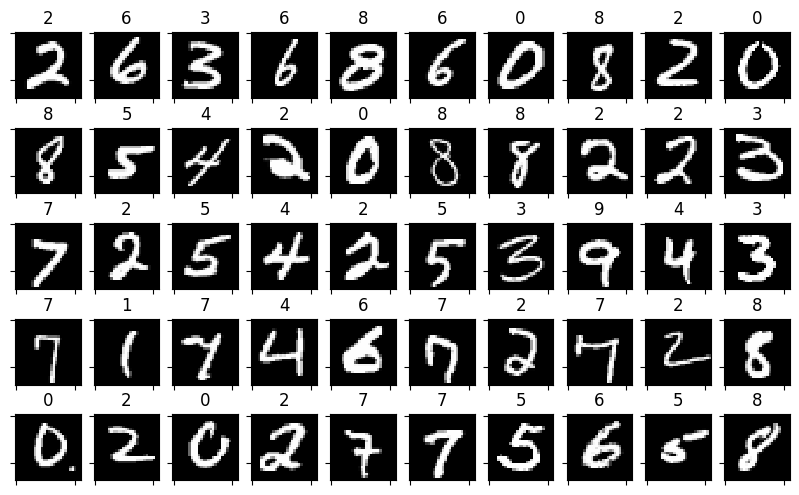

In [4]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## A regular neural network for classification

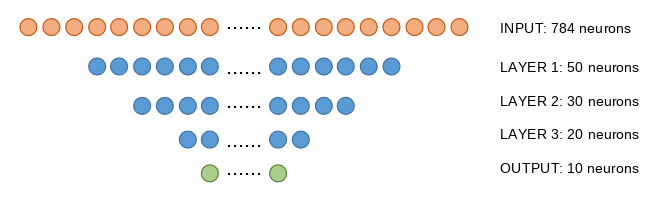

In [5]:
Image(filename='local/imgs/ann1.png')

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [6]:
yoh = np.eye(10)[y]

In [7]:
i = np.random.randint(len(y))
y[i], yoh[i]

(np.int64(8), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### create the model

In [10]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [13]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

In [14]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,610 (162.54 KB)

 Trainable params: 41,610 (162.54 KB)

 Non-trainable params: 0 (0.00 B)

### fit and display losses

In [15]:
model.fit(X_train, y_train_oh, epochs=100, batch_size=32, validation_data=(X_test, y_test_oh))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 2.2954 - val_loss: 2.1621
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.0720 - val_loss: 1.9600
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.8375 - val_loss: 1.7254
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.5696 - val_loss: 1.4649
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2652 - val_loss: 1.2484
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9803 - val_loss: 1.0799
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.8234 - val_loss: 0.9596
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6021 - val_loss: 0.9018
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4973 - val_loss: 0.8189
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3958 - val_loss: 0.7671
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3382 - val_loss: 0.7722
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

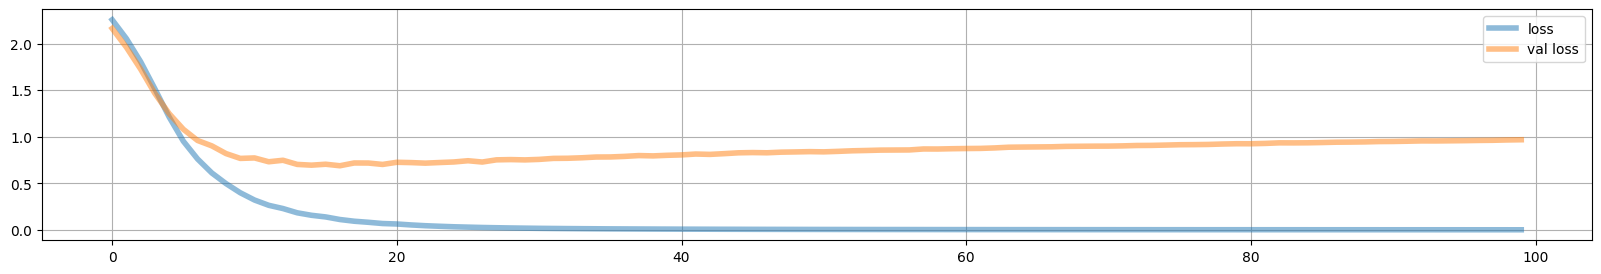

In [16]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [17]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy train 1.000
accuracy test  0.796


## Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

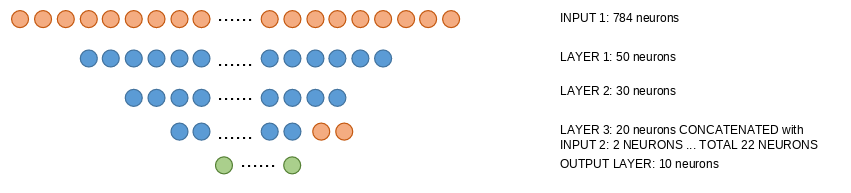

In [18]:
Image(filename='local/imgs/ann2.png')

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [28]:
class Concat(tf.keras.Layer):
    def call(self, layers):
        return tf.concat(layers,axis=1)

def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,), name="input_img")
    l11 = Dense(s1, activation="relu", name="dense1")(inp1)
    l12 = Dense(s2, activation="relu", name="dense2")(l11)
    l13 = Dense(s3, activation=s3_activation, name="dense3")(l12)

    inp2 = Input(shape=(extra_info_dim,), name="input_extra")
    cc1 = Concat()([l13, inp2])
    output = Dense(10, activation='softmax', name="output")(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [26]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [29]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 50)        │     39,250 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 30)        │      1,530 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense3 (Dense)      │ (None, 20)        │        620 │ dense2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_extra         │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat (Concat)     │ (None, 22)        │          0 │ dense3[0][0],     │
│                     │                   │            │ input_extra[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10)        │        230 │ concat[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 41,630 (162.62 KB)

 Trainable params: 41,630 (162.62 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=100, batch_size=32,
          validation_data=([X_test, X_test_extra], y_test_oh))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 2.4579 - val_loss: 2.2070
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.1755 - val_loss: 2.0255
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.9391 - val_loss: 1.7903
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6191 - val_loss: 1.5660
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3847 - val_loss: 1.3577
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.1145 - val_loss: 1.2180
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9945 - val_loss: 1.0937
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7901 - val_loss: 0.9952
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6896 - val_loss: 0.9166
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6219 - val_loss: 0.8615
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4936 - val_loss: 0.8130
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

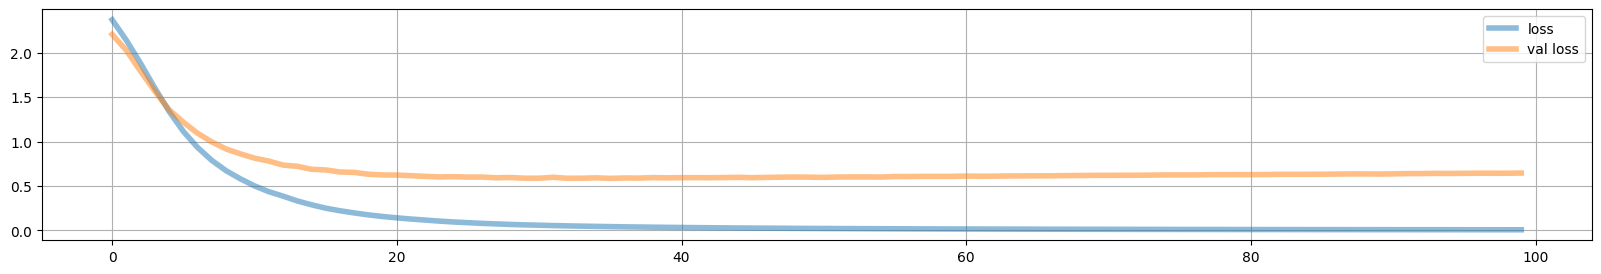

In [31]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [32]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
accuracy train 1.000
accuracy test  0.818
